In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import glob
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
train_benign_df = pd.read_csv("./csv_files/train_benign_asmfile.txt")
train_benign_df.drop(train_benign_df.columns[-1], axis=1, inplace=True)
train_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_benign_df['label'] = 0

train_malware_df = pd.read_csv("./csv_files/train_malware_asmfile.txt")
train_malware_df.drop(train_malware_df.columns[-1], axis=1, inplace=True)
train_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
train_malware_df['label'] = 1

test_benign_df = pd.read_csv("./csv_files/test_benign_asmfile.txt")
test_benign_df.drop(test_benign_df.columns[-1], axis=1, inplace=True)
test_benign_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_benign_df['label'] = 0

test_malware_df = pd.read_csv("./csv_files/test_malware_asmfile.txt")
test_malware_df.drop(test_malware_df.columns[-1], axis=1, inplace=True)
test_malware_df.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
test_malware_df['label'] = 1

valid_benign = pd.read_csv("./csv_files/valid_benign_asmfile.txt")
valid_benign.drop(valid_benign.columns[-1], axis=1, inplace=True)
valid_benign.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_benign['label'] = 0

valid_malware = pd.read_csv("./csv_files/valid_malware_asmfile.txt")
valid_malware.drop(valid_malware.columns[-1], axis=1, inplace=True)
valid_malware.set_axis(['ID', 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword'], axis='columns', inplace=True)
valid_malware['label'] = 1


In [4]:
import sklearn
df_list = [train_benign_df, train_malware_df, test_benign_df, test_malware_df, valid_benign, valid_malware]
full_df = pd.concat(df_list, ignore_index=True, axis=0)
full_shuffled_df = sklearn.utils.shuffle(full_df)
full_shuffled_df

,ID,jmp,mov,retf,push,pop,xor,retn,nop,sub,...,ebx,ecx,edi,ebp,esp,eip,.dll,std::,:dword,label
1897,1ccee3e439dd6c941fd46fa6d1fcf105,93,303,0,849,3,0,2,0,833,...,0,0,0,0,0,0,0,0,13,1
1318,02de20606bb1d0e3b1247b0414ada1a6,36,719,0,690,138,112,65,0,43,...,0,0,0,0,0,0,0,0,0,1
1638,1e8b5d9512b849cf0dbe1496e3f673fd,270,5481,0,5265,1355,315,720,8,146,...,0,0,0,0,0,0,0,0,692,1
810,9e3120817f595c0a23514d057cf534f5,600,2760,0,4636,386,153,187,1,243,...,0,0,0,0,0,0,0,0,1306,0
840,6cacaab1299986d27b6a56d51a82f969,311,2934,0,152,225,124,126,6,289,...,0,0,0,0,0,0,2,0,93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1d5c05189b82633f4e4757c098f8ef88,70,550,2,455,200,65,130,0,27,...,0,0,0,0,0,0,3,0,5,1
214,9e53bd2911562f500e776e54c93ade4a,707,8684,0,4818,1408,530,830,7,323,...,0,0,0,0,0,0,5,251,36,0
1357,2fd27862ea65e927b3d4cdedbed13f8a,693,4403,0,5395,1065,561,372,1,266,...,0,0,0,0,0,0,3,0,0,1
714,3fa994a0f7cff3a2e94e10acfe0e9ae5,6391,85174,0,30907,8547,1212,2692,2432,9384,...,0,0,0,0,0,0,1,5,829,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
NORMALIZE_VALID_COLUMNS = [ 'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx', 'edx','esi','eax','ebx','ecx','edi','ebp','esp','eip', '.dll', 'std::', ':dword']

full_shuffled_df[NORMALIZE_VALID_COLUMNS] = scaler.fit_transform(full_shuffled_df[NORMALIZE_VALID_COLUMNS])
full_shuffled_df[NORMALIZE_VALID_COLUMNS].astype('float')
full_shuffled_df

,ID,jmp,mov,retf,push,pop,xor,retn,nop,sub,...,ebx,ecx,edi,ebp,esp,eip,.dll,std::,:dword,label
1897,1ccee3e439dd6c941fd46fa6d1fcf105,0.000892,0.000179,0.000000,0.001403,0.000013,0.000000,0.000023,0.000000,0.007486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000440,1
1318,02de20606bb1d0e3b1247b0414ada1a6,0.000345,0.000437,0.000000,0.001140,0.000602,0.000717,0.000759,0.000000,0.000386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
1638,1e8b5d9512b849cf0dbe1496e3f673fd,0.002590,0.003392,0.000000,0.008702,0.005911,0.002018,0.008404,0.000345,0.001312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.023446,1
810,9e3120817f595c0a23514d057cf534f5,0.005755,0.001703,0.000000,0.007662,0.001684,0.000980,0.002183,0.000043,0.002184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.044250,0
840,6cacaab1299986d27b6a56d51a82f969,0.002983,0.001811,0.000000,0.000251,0.000982,0.000794,0.001471,0.000259,0.002597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005917,0.000000,0.003151,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1d5c05189b82633f4e4757c098f8ef88,0.000671,0.000332,0.001432,0.000752,0.000872,0.000416,0.001517,0.000000,0.000243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.008876,0.000000,0.000169,1
214,9e53bd2911562f500e776e54c93ade4a,0.006781,0.005379,0.000000,0.007963,0.006142,0.003395,0.009688,0.000302,0.002903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.014793,0.012092,0.001220,0
1357,2fd27862ea65e927b3d4cdedbed13f8a,0.006647,0.002723,0.000000,0.008917,0.004646,0.003593,0.004342,0.000043,0.002390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.008876,0.000000,0.000000,1
714,3fa994a0f7cff3a2e94e10acfe0e9ae5,0.061296,0.052840,0.000000,0.051083,0.037285,0.007763,0.031421,0.104968,0.084327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002959,0.000241,0.028088,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_shuffled_df[NORMALIZE_VALID_COLUMNS],full_shuffled_df['label'], stratify=full_shuffled_df['label'], test_size=0.2)
y_test.sum()

279

In [7]:
from sklearn.decomposition import PCA

skpca = PCA(n_components=30)
X_pca = skpca.fit_transform(X_train)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.998889946836364


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
features = full_shuffled_df[NORMALIZE_VALID_COLUMNS]
label = full_shuffled_df['label']

knn.fit(X_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=features.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred = knn.predict(X_test_pca)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.50      1.00      0.67       279

    accuracy                           0.50       559
   macro avg       0.25      0.50      0.33       559
weighted avg       0.25      0.50      0.33       559



In [9]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_pca,y_train)
    pred_i = knn.predict(X_test_pca)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

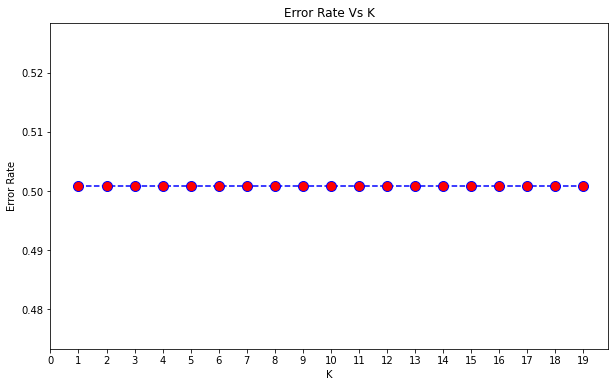

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue',linestyle="--",marker="o", markerfacecolor='red',markersize=10)
plt.title("Error Rate Vs K")
plt.xlabel("K")
plt.xticks(np.arange(0, 20, step=1))
plt.ylabel("Error Rate")

KNN은 효과 없음